<a href="https://colab.research.google.com/github/Manos-Mak120/-/blob/Vectorization/VECTOR_BIDEN_NEWSBOMB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import seaborn as sns

In [ ]:
 !python -m spacy download el_core_news_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.7.0/el_core_news_sm-3.7.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
biden_articles_df = pd.read_csv("/content/drive/MyDrive/Εργασία Python/Articles/biden_articles_20_21.to.csv")
biden_articles_df.head(200) # This is a syntax error - head() takes an int argument not slice

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1228361/m...,Μπάιντεν: Διάγγελμα για το Αφγανιστάν- O Αμερι...,2021-08-31,22:55:19+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",https://img.bbmd.gr/img/1260/max/82/2021/08/31...,NaN
1,https://www.newsbomb.gr/kosmos/story/1228111/m...,Μπλίνκεν: Θα συνεργαστούμε με τους Ταλιμπάν εά...,2021-08-31,06:15:09+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,«Κάθε βήμα που θα κάνουμε δεν θα βασίζεται στο...,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...,https://img.bbmd.gr/img/1260/max/82/2021/08/31...,(Jonathan Ernst/Pool via AP)
2,https://www.newsbomb.gr/kosmos/story/1228104/n...,Νέο διάγγελμα Μπάιντεν για το Αφγανιστάν,2021-08-31,02:00:50+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,Ο αμερικανός πρόεδρος Τζο Μπάιντεν θα εκφραστε...,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,(AP Photo/Manuel Balce Ceneta)
3,https://www.newsbomb.gr/kosmos/story/1227974/t...,Τυφώνας Άιντα: Η στιγμή που οι σφοδροί άνεμοι ...,2021-08-30,15:17:36+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο τυφώνας Άιντα έφθασε πάνω από το έδαφος όντα...,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...,https://img.bbmd.gr/img/1260/max/82/2021/08/30...,Οι δυνατοί άνεμοι ξηλώνουν την οροφή του νοσοκ...
4,https://www.newsbomb.gr/kosmos/story/1227963/s...,Σάλος με τον Μπαίντεν να κοιτά το ρολόι του στ...,2021-08-30,14:45:20+03:00,ΚΟΣΜΟΣ,Newsbomb,Πύρα δέχεται ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μ...,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,"Κατά τη διάρκεια της τελετής, ο Μπάιντεν εμφαν..."
...,...,...,...,...,...,...,...,...,...,...
195,https://www.newsbomb.gr/kosmos/story/1203589/h...,ΗΠΑ: Ο Τζο Μπάιντεν προσκάλεσε τον πρόεδρο της...,2021-06-07,23:55:47+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μίλησε σήμερα ...,"Σύμφωνα με τον Σάλιβαν, ο Μπάιντεν είπε ότι «α...",https://img.bbmd.gr/img/1260/max/82/2021/06/07...,NaN
196,https://www.newsbomb.gr/kosmos/story/1203574/e...,«Έκλεισε» η συνάντηση Μπάιντεν - Ερντογάν - Πο...,2021-06-07,21:39:19+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Λευκός Οίκος κάνει λόγο για «πρακτική» ευκαι...,Ο πρόεδρος των ΗΠΑΤζο Μπάιντενστην προγραμματι...,https://img.bbmd.gr/img/1260/max/82/2021/06/07...,NaN
197,https://www.newsbomb.gr/kosmos/story/1203393/r...,Ρωσία: Ο Πούτιν «έβγαλε» τη Ρωσία από τη συνθή...,2021-06-07,12:07:15+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο Ρώσος πρόεδρος Βλαντιμίρ Πούτιν υπέγραψε νόμ...,"Ο Πούτιν υπέγραψε σήμερα νόμο, ο οποίος επισημ...",https://img.bbmd.gr/img/1260/max/82/2021/06/07...,NaN
198,https://www.newsbomb.gr/ellada/story/1202827/d...,Δέσμευση της κυβέρνησης Μπάιντεν για περαιτέρω...,2021-06-05,02:00:52+03:00,ΕΛΛΑΔΑ,Newsbomb,Η αυξανόμενη αμυντική συνεργασία μεταξύ Ουάσιγ...,Ο Σύμβουλος Εθνικής Ασφαλείας των ΗΠΑ χαιρέτισ...,https://img.bbmd.gr/img/1260/max/82/2021/06/04...,NaN


In [ ]:
biden_articles_df.head(115)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation
0,https://www.newsbomb.gr/kosmos/story/1228361/m...,Μπάιντεν: Διάγγελμα για το Αφγανιστάν- O Αμερι...,2021-08-31,22:55:19+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,"Μετά από δύο εβδομάδες πτήσεων εκκένωσης, μια ...",https://img.bbmd.gr/img/1260/max/82/2021/08/31...,NaN
1,https://www.newsbomb.gr/kosmos/story/1228111/m...,Μπλίνκεν: Θα συνεργαστούμε με τους Ταλιμπάν εά...,2021-08-31,06:15:09+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,«Κάθε βήμα που θα κάνουμε δεν θα βασίζεται στο...,Οι ΗΠΑ είναι διατεθειμένες να «συνεργαστούν» μ...,https://img.bbmd.gr/img/1260/max/82/2021/08/31...,(Jonathan Ernst/Pool via AP)
2,https://www.newsbomb.gr/kosmos/story/1228104/n...,Νέο διάγγελμα Μπάιντεν για το Αφγανιστάν,2021-08-31,02:00:50+03:00,ΚΟΣΜΟΣ,Γιάννης Καλύβας,Ο αμερικανός πρόεδρος Τζο Μπάιντεν θα εκφραστε...,"Όπως διευκρίνισε η αμερικανική προεδρία, ο κ. ...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,(AP Photo/Manuel Balce Ceneta)
3,https://www.newsbomb.gr/kosmos/story/1227974/t...,Τυφώνας Άιντα: Η στιγμή που οι σφοδροί άνεμοι ...,2021-08-30,15:17:36+03:00,ΚΟΣΜΟΣ,Newsbomb,Ο τυφώνας Άιντα έφθασε πάνω από το έδαφος όντα...,Viral έχει γίνει στο διαδίκτυο ένα σοκαριστικό...,https://img.bbmd.gr/img/1260/max/82/2021/08/30...,Οι δυνατοί άνεμοι ξηλώνουν την οροφή του νοσοκ...
4,https://www.newsbomb.gr/kosmos/story/1227963/s...,Σάλος με τον Μπαίντεν να κοιτά το ρολόι του στ...,2021-08-30,14:45:20+03:00,ΚΟΣΜΟΣ,Newsbomb,Πύρα δέχεται ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μ...,"Σύμφωνα με την Daily Mail, o Τζο Μπάιντεν ταξί...",https://img.bbmd.gr/img/1260/max/82/2021/08/30...,"Κατά τη διάρκεια της τελετής, ο Μπάιντεν εμφαν..."
...,...,...,...,...,...,...,...,...,...,...
110,https://www.newsbomb.gr/kosmos/story/1208168/a...,Αφγανιστάν: Οι ΗΠΑ ίσως καθυστερήσουν την απόσ...,2021-06-22,13:46:40+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Ο αμερικανικός στρατός ενδέχεται να επιβραδύνε...,Ο εκπρόσωπος του Υπουργείου Άμυνας των ΗΠΑ Τζο...,https://img.bbmd.gr/img/1260/max/82/2021/06/22...,NaN
111,https://www.newsbomb.gr/kosmos/story/1208004/v...,Βελτιώνονται οι σχέσεις ΗΠΑ-Ρωσίας: Επιστρέφου...,2021-06-22,01:12:55+03:00,ΚΟΣΜΟΣ,Γιάννης Φιλιππάκος,Ο πρεσβευτής των Ηνωμένων Πολιτειών στην Μόσχα...,Η επιστροφή των πρεσβευτών αποφασίσθηκε κατά τ...,https://img.bbmd.gr/img/1260/max/82/2021/06/21...,AP Photo
112,https://www.newsbomb.gr/kosmos/story/1207913/r...,Ραΐσι: Να αρθούν όλες οι κυρώσεις που έχουν επ...,2021-06-21,16:08:05+03:00,ΚΟΣΜΟΣ,Κωνσταντίνος Μαυραγάνης,"Ο νικητής των ιρανικών εκλογών, εκλεγμένος πρό...","Ο 60χρονος, σκληροπυρηνικός και επικριτής της ...",https://img.bbmd.gr/img/1260/max/82/2021/06/21...,AP
113,https://www.newsbomb.gr/kosmos/story/1207883/h...,ΗΠΑ: Αποκαλύψεις-φωτιά για «διορισμούς» ημετέρ...,2021-06-21,14:37:51+03:00,ΚΟΣΜΟΣ,Νατάσα Παυλοπούλου,Παιδιά και συγγενείς κορυφαίων συνεργατών του ...,Τα παιδιά κορυφαίων συνεργατώντου προέδρου των...,https://img.bbmd.gr/img/1260/max/82/2021/06/21...,NaN


In [ ]:
biden_articles_df['date'] = pd.to_datetime(biden_articles_df['date'], format='mixed', dayfirst=True, errors='coerce')

In [ ]:
biden_articles_df.dtypes

,0
article_url,object
title,object
date,datetime64[ns]
time,object
section,object
author,object
excerpt,object
text_body,object
feat_img_link,object
feat_img_cation,object


In [ ]:
short_biden_df = biden_articles_df[['date','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
# Now that short_biden_df is defined, we can localize the timezone
short_biden_df['date'] = short_biden_df['date'].dt.tz_localize(None)
short_biden_df.head(1)

,date,excerpt
0,2021-08-31,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...


In [ ]:
short_biden_df['date'] = short_biden_df['date'].dt.tz_localize(None)

In [ ]:
short_biden_df = biden_articles_df[['date','excerpt']]
short_biden_df = short_biden_df.reset_index(drop=True)
short_biden_df.head(1)

,date,excerpt
0,2021-08-31,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...


In [ ]:
short_biden_df['year'] = pd.DatetimeIndex(short_biden_df['date']).year
short_biden_df['month'] = pd.DatetimeIndex(short_biden_df['date']).month
short_biden_df['day'] = pd.DatetimeIndex(short_biden_df['date']).day
short_biden_df['hour'] = pd.DatetimeIndex(short_biden_df['date']).hour

In [ ]:
short_biden_df.head()

,date,excerpt,year,month,day,hour
0,2021-08-31,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,2021,8,31,0
1,2021-08-31,«Κάθε βήμα που θα κάνουμε δεν θα βασίζεται στο...,2021,8,31,0
2,2021-08-31,Ο αμερικανός πρόεδρος Τζο Μπάιντεν θα εκφραστε...,2021,8,31,0
3,2021-08-30,Ο τυφώνας Άιντα έφθασε πάνω από το έδαφος όντα...,2021,8,30,0
4,2021-08-30,Πύρα δέχεται ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μ...,2021,8,30,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer() #πάντα αυτό

In [ ]:
short_biden_df.head(5)

,date,excerpt,year,month,day,hour
0,2021-08-31,Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρο...,2021,8,31,0
1,2021-08-31,«Κάθε βήμα που θα κάνουμε δεν θα βασίζεται στο...,2021,8,31,0
2,2021-08-31,Ο αμερικανός πρόεδρος Τζο Μπάιντεν θα εκφραστε...,2021,8,31,0
3,2021-08-30,Ο τυφώνας Άιντα έφθασε πάνω από το έδαφος όντα...,2021,8,30,0
4,2021-08-30,Πύρα δέχεται ο πρόεδρος των ΗΠΑ Τζο Μπάιντεν μ...,2021,8,30,0


In [ ]:
short_biden_df.shape

(911, 6)

In [ ]:
short_biden_df['excerpt'] = short_biden_df['excerpt'].fillna('')

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt']) #παίρνουμε τα κείμενα

In [ ]:
count_vector #μοναδικές λέξεις 11520 + 120

<911x5690 sparse matrix of type '<class 'numpy.int64'>'
	with 25345 stored elements in Compressed Sparse Row format>

In [ ]:
count_vector.shape

(911, 5690)

In [ ]:
BoW = cv.get_feature_names_out()
list(BoW)[1400:1410]

['γενικευμένης',
 'γενικός',
 'γενικότερα',
 'γεννήθηκε',
 'γενναιόδωρή',
 'γεννηματά',
 'γενοκτονία',
 'γενοκτονίας',
 'γενς',
 'γεονοκτονία']

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,03,04,05,06,08,09,10,...,ύμνο,ύπατος,ύστατη,ύστερα,ύψη,ύψους,ώθηση,ώρα,ώρες,ώστε
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words))

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,00,000,01,03,04,05,06,08,09,10,...,όψει,ύβρεις,ύμνο,ύπατος,ύστατη,ύψη,ύψους,ώθηση,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= list(nlp.Defaults.stop_words), max_df=0.95, min_df=0.01) #πάρε ο,τι είναι πάνω του 95% των κειμένων

In [ ]:
count_vector = cv.fit_transform(short_biden_df['excerpt'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

,000,10,100,11,12,15,16,19,20,2020,...,χαρακτήρισε,χθες,χρόνια,χωρών,χώρα,χώρας,χώρες,ψήφων,ώρα,ώρες
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2020,αμερικανικές,αμερικανός,αποτελέσματα,δήλωσε,δύο,εκλογές,ηπα,μπάιντεν,νίκη,ντόναλντ,πούτιν,προέδρου,προεδρικές,πρόεδρο,πρόεδρος,σήμερα,τζο,τραμπ,ώρα
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20) # δειξε μου τα 20 πιο συχνά
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,2020,αμερικανικές,αμερικανός,αποτελέσματα,δήλωσε,δύο,εκλογές,ηπα,μπάιντεν,νίκη,ντόναλντ,πούτιν,προέδρου,προεδρικές,πρόεδρο,πρόεδρος,σήμερα,τζο,τραμπ,ώρα
0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,covid 19,αμερικανικές εκλογές,αμερικανού προέδρου,αμερικανός πρόεδρος,εκλεγμένος πρόεδρος,εκλογές ηπα,ηπα 2020,ηπα τζο,κορονοϊός ειδήσεις,λευκό οίκο,ντόναλντ τραμπ,προέδρου ηπα,προέδρου τζο,προεδρικές εκλογές,πρόεδρο ηπα,πρόεδρος ηπα,πρόεδρος τζο,ρετζέπ ταγίπ,ταγίπ ερντογάν,τζο μπάιντεν
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
results.sum(axis =0).sort_values(ascending = False) #Προσθήκη axis στο συνολο των αποτελσμάτων . Στα rows. Μελετάει τις εμφανίσεις αυτού τοτ term.

,0
τζο μπάιντεν,513
εκλογές ηπα,162
ντόναλντ τραμπ,159
πρόεδρος ηπα,122
ηπα τζο,116
ηπα 2020,107
αμερικανός πρόεδρος,84
πρόεδρος τζο,78
προεδρικές εκλογές,51
λευκό οίκο,44


In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

,0
τζο μπάιντεν,513
εκλογές ηπα,162
ντόναλντ τραμπ,159
πρόεδρος ηπα,122
ηπα τζο,116


In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,  #Με αυτό το τρόπο φτιάχνουμε ένα λεξικό παίρνωντας τις λέξεις
                     vocabulary = ['εκλογές', 'πρόεδρος', 'ορκομωσία'])
count_vector = cv.fit_transform(short_biden_df['excerpt'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

,εκλογές,πρόεδρος,ορκομωσία
0,0,1,0
1,0,0,0
2,0,1,0
3,0,0,0
4,0,1,0


In [ ]:
results.sort_values(by=['εκλογές'], ascending=False).head()

,εκλογές,πρόεδρος,ορκομωσία
879,3,0,0
719,2,0,0
864,2,0,0
816,2,0,0
854,2,0,0


In [ ]:
short_biden_df['excerpt'].loc[10]

'Οι Αμερικανοί στρατιωτικοί που βρίσκονται στην πρωτεύουσα του Αφγανιστάν είναι πλέον λιγότεροι από 4.000.'

In [ ]:
biden_articles_df['title'].loc[10]

'Αφγανιστάν: Κάτω από 4.000 πλέον οι Αμερικανοί στρατιώτες στην Καμπούλ'

In [ ]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=10, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_biden_df.iloc[[10]]['excerpt'])
results114 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
sum_words114 =  results114.sum(axis =0)
sum_words114.sort_values(ascending = False).head()

,0
αμερικανοί στρατιωτικοί,1
αφγανιστάν λιγότεροι,1
βρίσκονται πρωτεύουσα,1
λιγότεροι 000,1
πρωτεύουσα αφγανιστάν,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results.head()

,000,10,100,11,12,14,15,16,17,19,...,χωρών,χώρα,χώρας,χώρες,ψήφους,ψήφων,ψηφίσει,ύψους,ώρα,ώρες
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity #ΚΑΤΑ ΠΟΣΟ ΤΑ ΑΡΘΡΑ ΜΟΥ ΔΙΑΦΕΡΟΥΝ ΑΠΟ ΤΟΥΣ ΥΠΟΛΟΙΠΟΥΣ. ΠΟΣΟ ΟΙ ΑΛΛΟΙ ΕΧΟΥΝ ΕΠΗΡΕΑΣΤΕΙ ΑΠΟ ΜΕΝΑ

print("cosine scores ==> ")
print(cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with all elements (including itself)

cosine scores ==> 
[[1.         0.01388331 0.13703768 0.         0.36872539 0.12444997
  0.         0.0356882  0.40647532 0.07245891 0.14230643 0.03834416
  0.05291126 0.02241679 0.05632184 0.02361399 0.         0.22609008
  0.01768799 0.03987196 0.1815734  0.18646857 0.12199659 0.40748187
  0.         0.15328089 0.15395168 0.19737397 0.15457993 0.01052722
  0.25855234 0.230032   0.09600865 0.04282759 0.18369856 0.1107791
  0.2799855  0.1682739  0.         0.15303168 0.2543801  0.29288443
  0.1371504  0.09741288 0.13840507 0.09690767 0.05012315 0.20411135
  0.13360515 0.11384282 0.         0.02593549 0.15224389 0.03627364
  0.04348755 0.02186559 0.02185633 0.01653751 0.14327863 0.
  0.01023883 0.0179781  0.         0.05729129 0.07904514 0.13233026
  0.         0.06608434 0.         0.05893352 0.18512924 0.
  0.01181137 0.         0.         0.06888258 0.01625015 0.
  0.07117492 0.0400482  0.04480754 0.0365411  0.03870976 0.05897502
  0.         0.02457228 0.         0.01240777 0.047194

In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train) # συγκρίνουμε όλα τα άρθρα μεταξύ τους

In [ ]:
len(arr)

911

<Axes: >

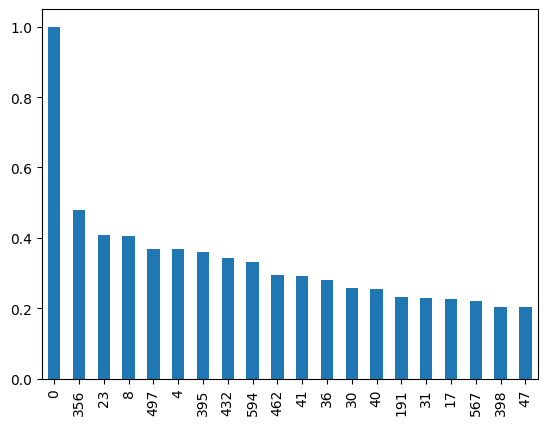

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_biden_df['excerpt'].loc[0]

'Mήνυμα στον αμερικανικό λαό απηύθυνε ο πρόεδρος Μπάιντεν, την ημέρα που και οι τελευταίοι στρατιώτες των ΗΠΑ εγκατέλειψαν το Αφγανιστάν.'

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_biden_df['excerpt'])  #finds the tfidf score with normalization

In [ ]:
short_biden_df['excerpt'].loc[4]

'Πύρα δέχεται ο πρόεδρος των ΗΠΑ\xa0Τζο Μπάιντεν μετά τις εικόνες που τον δείχνουν να κοιτάζει το ρολόι του κατά τη διάρκεια της τελετής για τους στρατιώτες που σκοτώθηκαν την Πέμπτη στην επίθεση αυτοκτονίας του ISIS-K στην Καμπούλ στο Αφγανιστάν.'

<Axes: >

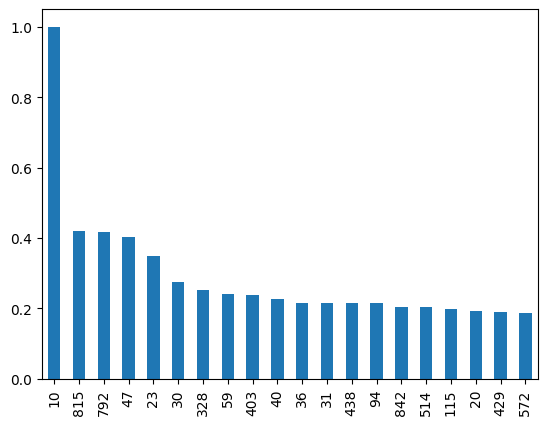

In [ ]:
pd.DataFrame(arr).loc[10].sort_values(ascending = False).head(20).plot(kind = 'bar')

<Axes: >

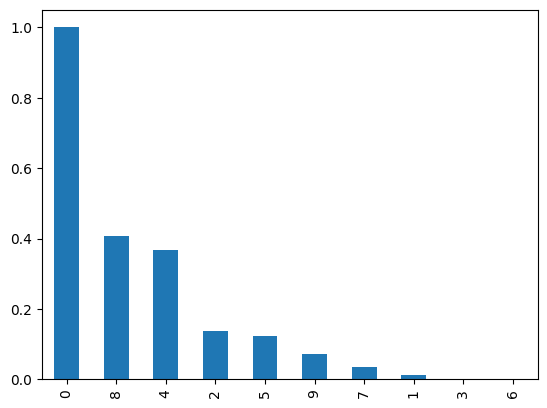

In [ ]:
pd.DataFrame(arr).loc[0].sort_values(ascending = False).tail(10).plot(kind = 'bar')

In [ ]:
short_biden_df['excerpt'].loc[10]

'Οι Αμερικανοί στρατιωτικοί που βρίσκονται στην πρωτεύουσα του Αφγανιστάν είναι πλέον λιγότεροι από 4.000.'

In [ ]:
short_biden_df['excerpt'].loc[15]

'Η χθεσινή «εύθραυστη» εικόνα του Τζο Μπάιντεν άφησε ανάμεικτα συναισθήματα στους Αμερικανούς πολίτες'

In [ ]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10]) # συγκρίνουμε τα 10 πρώτα άρθρα μεταξύ τους

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπάιντεν:Newsbomb)'}>

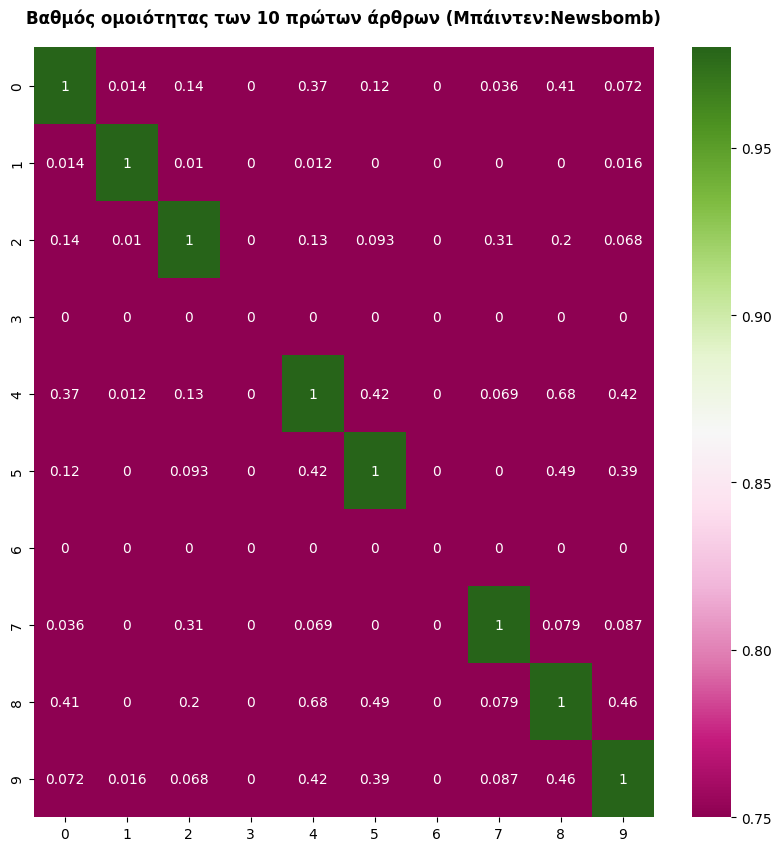

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων (Μπάιντεν:Newsbomb)', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

sns.heatmap(data=arr, annot=True, vmin=0.75, vmax=0.98, cmap="PiYG")

#plt.savefig('<το path και το όνομα του αρχείου>.png')

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

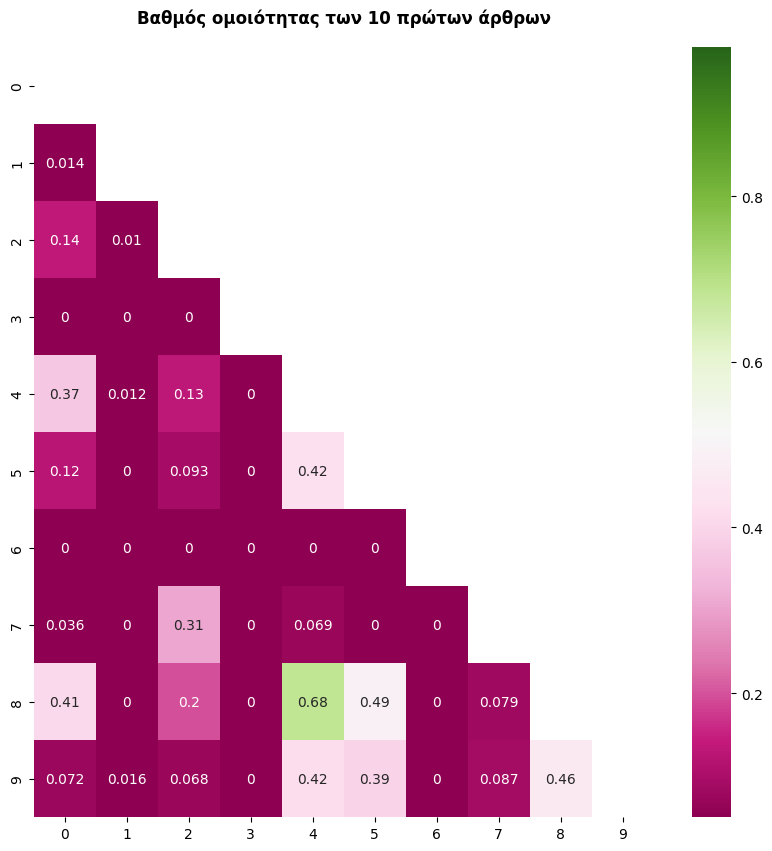

In [ ]:
plt.figure(figsize=(10, 10))
# annot = True to print the values inside the square
plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold') # το y ορίζει την απόσταση του τίτλου από το γράφημα

# mask
mask = np.triu(np.ones_like(arr, dtype=bool))
sns.heatmap(data=arr, annot=True, vmin=0.05, vmax=0.98, cmap="PiYG", mask=mask)

#plt.savefig('<το path και το όνομα του αρχείου>.png')